<a href="https://colab.research.google.com/github/alberzenon/AnalisisyVisualizacion/blob/master/Copia_de_17_Series_de_tiempo_y_visualizacioes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de Tiempo

En las lecturas previas se aprendio a como trabajar con **variables nulas** y a como darle formato a las **variables de tipo tiempo**. 

En esta sección se vera como utilizar las herramientas anteriores y como trabajar con **series de tiempo**. Se utilizará una base de dato que tiene información sobre el **coronavirus**. La misma la podemos encontrar en el siguiente enlace a la base de datos de [covid-19](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=covid_19_data.csv)

In [51]:
import pandas as pd

In [52]:
df = pd.read_csv('https://raw.githubusercontent.com/alberzenon/AprendizajeAutomatico/main/Actividades/Evidencia1/covid_19_data.csv')
df


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


## Da formato tiempo a una columna

Vamos a darle un poco de formato al dataframe tipo tiempo a la segunda columna:

In [53]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

Vamos a trabajar solo con algunas columnas de dataframe, para ver las columnas lo hacemos con **list(df)**

In [54]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [55]:
df = df[[
         'ObservationDate',
         'Country/Region',
         'Confirmed',
         'Deaths',
         'Recovered'
         ]]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
306424,2021-05-29,Ukraine,102641.0,2335.0,95289.0
306425,2021-05-29,Netherlands,29147.0,245.0,0.0
306426,2021-05-29,Mainland China,1364.0,1.0,1324.0
306427,2021-05-29,Ukraine,87550.0,1738.0,83790.0


## Trabajando con groupby

Vamos a crear un nuevo groupby, utilizaremos como indices a las fechas.

In [56]:
df_time = df.groupby('ObservationDate').sum()
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0
2021-05-26,168416423.0,3498544.0,105380748.0
2021-05-27,168970791.0,3511297.0,106078106.0


En este caso el tiempo ha quedado como el indice del dataframe

In [57]:
df1 = df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [58]:
df2 = df_time['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

Cuando tenemos dos series con un sistema de indices por fecha podemos realizar operaciones entre las mismas

In [59]:
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

## Agregando datos faltantes iniciales.

Ahora queremos ver como ha ido aumentando dia tras dia la cifra del covid

In [60]:
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0
2021-05-26,168416423.0,3498544.0,105380748.0
2021-05-27,168970791.0,3511297.0,106078106.0


In [61]:
df_time.diff()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


Incluso podriamos ver el promedio de coronavirus por dia hasta la fecha.

In [62]:
df_time.diff().mean()

Confirmed    344728.200811
Deaths         7167.549696
Recovered    217323.811359
dtype: float64

En el dataframe que creamos la primer fila la tenemos con valores nulos ya que la función diff() el valor de la fila con el anterior, y como la primera no tiene con quien restar el valor es NaN.

In [63]:
df_diff = df_time.diff()
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


Vamos a usar fillna() para completar el registro

In [64]:
df_time.head(1)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0


Generamos un diccionario con el registro para meterlo en el dataframe creado, lo copiamos y lo modificamos.

In [65]:
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 557.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 30.0}}

In [66]:
df_diff = df_diff.fillna(
    {'Confirmed': 555.0,
     'Deaths': 17.0,
     'Recovered': 28.0})

Ahora podemos ver el dataframe con el data faltante

In [67]:
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


Y podemos ver las suma acumulativa 

In [68]:
df_diff.cumsum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,1095.0,34.0,58.0
2020-01-24,939.0,26.0,37.0
2020-01-25,1435.0,42.0,40.0
2020-01-26,2116.0,56.0,54.0
...,...,...,...
2021-05-25,167848205.0,3485788.0,104824933.0
2021-05-26,168416421.0,3498544.0,105380746.0
2021-05-27,168970789.0,3511297.0,106078104.0


## Extrayendo valor estadistico del dataframe

Con **resample** podemos hacer algunas estimaciones estadisticas.
Veremos la como utilizar función **resample** en **series de tiempo** para extraer **valor estadistico** de nuestros datos. Como ha ido cambiando el numero de casos observados dada una frecuencia determinada, como el mes o la semana.

Puedo ver los casos cada 7 dias, por ejemplo.

In [69]:
df_diff.resample('7D').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5576.0,131.0,106.0
2020-01-29,18314.0,361.0,749.0
2020-02-05,20911.0,621.0,3827.0
2020-02-12,30335.0,894.0,9668.0
2020-02-19,5277.0,701.0,13553.0
...,...,...,...
2021-04-28,5642661.0,92528.0,4666430.0
2021-05-05,5331241.0,89658.0,4838711.0
2021-05-12,4541037.0,86840.0,4800529.0


Tambien podria ver los casos cada 7 dias, pero especificamente cada domingo:

In [70]:
df_diff.resample('W-Sun').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,2116.0,56.0,54.0
2020-02-02,14669.0,306.0,420.0
2020-02-09,23364.0,544.0,2769.0
2020-02-16,31075.0,864.0,7621.0
2020-02-23,7759.0,699.0,12528.0
...,...,...,...
2021-05-02,5680889.0,93206.0,4734311.0
2021-05-09,5459865.0,90258.0,4759410.0
2021-05-16,4739560.0,86338.0,4692644.0


O la suma mensual de casos de covid-19 de forma mensual

In [71]:
df_diff.resample('M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9923.0,213.0,223.0
2020-02-29,76087.0,2728.0,39556.0
2020-03-31,771462.0,39242.0,138226.0
2020-04-30,2401731.0,192394.0,837095.0
2020-05-31,2910561.0,138242.0,1626127.0
2020-06-30,4319842.0,138411.0,2711439.0
2020-07-31,7127806.0,168508.0,5019965.0
2020-08-31,7909780.0,171272.0,6449484.0
2020-09-30,8504867.0,163907.0,6847448.0


Contemos cuantos dias tienen los meses, esto nos va a dar una mirada de los  

In [72]:
df_diff.resample('M').count()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,31,31,31
2020-04-30,30,30,30
2020-05-31,31,31,31
2020-06-30,30,30,30
2020-07-31,31,31,31
2020-08-31,31,31,31
2020-09-30,30,30,30


In [73]:
df_diff.resample('M').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,992.300000,21.300000,22.300000
2020-02-29,2623.689655,94.068966,1364.000000
2020-03-31,24885.870968,1265.870968,4458.903226
2020-04-30,80057.700000,6413.133333,27903.166667
2020-05-31,93889.064516,4459.419355,52455.709677
2020-06-30,143994.733333,4613.700000,90381.300000
2020-07-31,229929.225806,5435.741935,161934.354839
2020-08-31,255154.193548,5524.903226,208047.870968
2020-09-30,283495.566667,5463.566667,228248.266667


# Series de Tiempo - variables nulas

Vamos a ver en mas profundidad las variables nulas y como trabajar con ellas. Tambien trabajaremos con graficos simples.

## Trabajando con variables nulas

Lo que hicimos antes fue utilizar la función **resample** para extraer valor estadistico segun un intervalo definido por nosotros. Extrajimos la cantidad de observaciones de la cantidad de confirmados, muertos y recuperados por COVID-19 en una **frecuencia mensual**.

Cambiemos nuestra frecuencia y veamos que pasa:

In [74]:
df_diff.resample('12h').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,0.0,0.0,0.0
2020-01-23 00:00:00,540.0,17.0,30.0
2020-01-23 12:00:00,0.0,0.0,0.0
2020-01-24 00:00:00,-156.0,-8.0,-21.0
...,...,...,...
2021-05-27 00:00:00,554368.0,12753.0,697358.0
2021-05-27 12:00:00,0.0,0.0,0.0
2021-05-28 00:00:00,499934.0,11820.0,554963.0


Para cada intervalo de 12 horas donde yo no tenia datos previamente definidos se autocompleta con **0**, ahora si intento obtener el promedio, tendremos valores nulos:

In [75]:
df_diff.resample('12h').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,540.0,17.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,-156.0,-8.0,-21.0
...,...,...,...
2021-05-27 00:00:00,554368.0,12753.0,697358.0
2021-05-27 12:00:00,NaN,NaN,NaN
2021-05-28 00:00:00,499934.0,11820.0,554963.0


Vamos a recuperar nuestra suma y obtener datos nulos, para luego poder trabajar con estos, y lo haremos con nuestro dataframe df_time, el cual tiene nuestros datos originales:

In [76]:
df_cum = df_time.resample('12h').sum(min_count=1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,NaN,NaN,NaN
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


Vamos a tratar de recupearar los datos nulos, existen 2 tipos de funciones para completar los valores nulos con los datos superiores o inferiores:

In [77]:
df_cum.bfill()  # Con los datos inferiores completo la celda superior

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,1097.0,34.0,60.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,941.0,26.0,39.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,169470725.0,3523117.0,106633069.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [78]:
df_cum.ffill()  # Con los datos superiores completo la celda inferior

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,557.0,17.0,30.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,1097.0,34.0,60.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,168970791.0,3511297.0,106078106.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


Incluso puedo reemplazar todos los valores nulos con valores que yo quiera:

In [79]:
df_cum.fillna(-1000)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,-1000.0,-1000.0,-1000.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,-1000.0,-1000.0,-1000.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,-1000.0,-1000.0,-1000.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


Una buena opcion para datos nulos en series de tiempo es utilizar la funcion **interpolate**, esta funcion nos completara con un datos interpolado con la fila superior y la inferior, y agregará un posible dato que puede corresponder a dicha fila. Lo que hace es una **interpolación lineal**

In [80]:
df_cum = df_cum.interpolate()
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,827.0,25.5,45.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,1019.0,30.0,49.5
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


## Agrupando series de tiempo y graficando datos simples

Utilizaremos herramientas de pandas para hacer analisis de series de tiempo, **como agrupar** cuando tenemos columnas de tipo tiempo, utilizando una función llamada **Grouper** y veremos la importancia de trabajar con **intervalos de tiempo** y calcular **suavizados de curvas**, usando **rolling()**.

En general en la naturaleza haremos este tipo de analisis por ejemplo en:
* temperaturas a lo largo de un año.
* cuando realizamos proyecciones financieras.

Creemos una nueva columna, esta será la **tasa de supervivencia** al COVID-19

In [81]:
df_cum['rate'] = 1 - df_cum['Deaths'] / df_cum['Confirmed']
df_cum

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,557.0,17.0,30.0,0.969479
2020-01-22 12:00:00,827.0,25.5,45.0,0.969166
2020-01-23 00:00:00,1097.0,34.0,60.0,0.969006
2020-01-23 12:00:00,1019.0,30.0,49.5,0.970559
2020-01-24 00:00:00,941.0,26.0,39.0,0.972370
...,...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0,0.979220
2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5,0.979215
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0,0.979211


Eliminemos al tiempo como indice y contemplemos un nuevo tipo de base de datos, esto es cuando nuestra variable de tipo tiempo no pertenece al indice

In [82]:
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,557.0,17.0,30.0,0.969479
1,2020-01-22 12:00:00,827.0,25.5,45.0,0.969166
2,2020-01-23 00:00:00,1097.0,34.0,60.0,0.969006
3,2020-01-23 12:00:00,1019.0,30.0,49.5,0.970559
4,2020-01-24 00:00:00,941.0,26.0,39.0,0.972370
...,...,...,...,...,...
982,2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0,0.979220
983,2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5,0.979215
984,2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0,0.979211
985,2021-05-28 12:00:00,169711142.5,3528368.0,106886869.0,0.979210


Utilicemos un groupby especial para series de tiempo. Vamos a determinar una frecuencia en la cual haremos nuestra observación estadística, en este caso lo haremos mensual. Trabajaremos con la nueva columna que es la tasa de supervivencia y calcularemos la media.

In [83]:
df_cum.groupby(pd.Grouper(key='ObservationDate', freq= 'M'))[['rate']].mean()

,rate
ObservationDate,
2020-01-31,0.974241
2020-02-29,0.973562
2020-03-31,0.960046
2020-04-30,0.935326
2020-05-31,0.933192
2020-06-30,0.945718
2020-07-31,0.957081
2020-08-31,0.964339
2020-09-30,0.968524


Podemos visualizar de forma gráfica lo anterior, cambiemos la frecuencia en la cual haremos nuestro estudio, esta será a un dia.

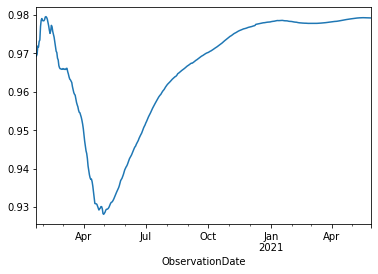

In [84]:
serie = df_cum.groupby(pd.Grouper(key='ObservationDate', freq= '1d'))['rate'].mean()
serie.plot()

Podemos hacer la gráfica anterior visualmente mas agradable haciendo un suavizado. El mismo se realiza calculando los promedios y graficandolos.

Utilicemos la funcion .rolling(), la misma nos permite hacer promedios con ventajas de frecuencia

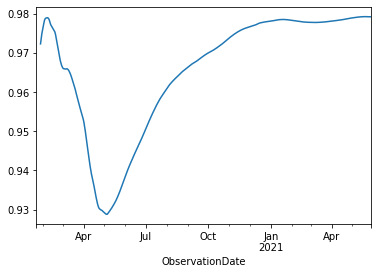

In [85]:
serie.rolling(window=7).mean().plot()

Comparemos ahora las gráficas:

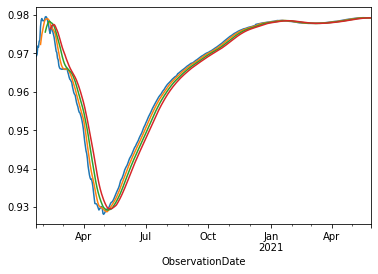

In [86]:
serie.plot()
serie.rolling(window=7).mean().plot()
serie.rolling(window=14).mean().plot()
serie.rolling(window=21).mean().plot()

Tambien podemos hacer la gráfica anterior mas agradable de utilizando la libreria matplotlib y agregando labels

Text(0.5, 1.0, 'Promedio móvil de Tasa de Supervivencia')

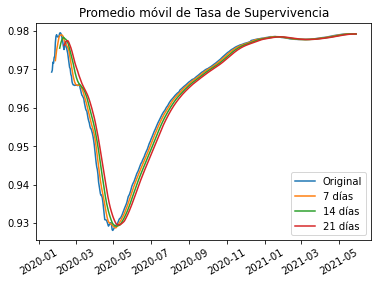

In [87]:
import matplotlib.pyplot as plt

plt.plot(serie, label = 'Original')
plt.plot(serie.rolling(window = 7).mean(), label = '7 días')
plt.plot(serie.rolling(window = 14).mean(), label = '14 días')
plt.plot(serie.rolling(window = 21).mean(), label = '21 días')

plt.xticks(rotation = '30')
plt.legend()
plt.title('Promedio móvil de Tasa de Supervivencia')

Cada vez que aumentamos el tamaño de la ventana para tomar datos y sacar su promedio, aumentamos el suavizado de la gráfica

Por último analicemos como ha ido variando la desviación estandar de nuestra tasa de supervivencia.

In [88]:
import numpy as np

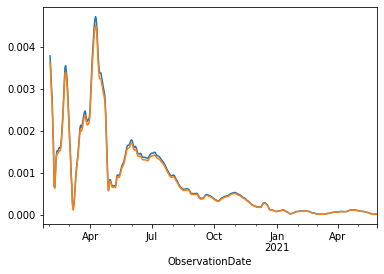

In [89]:
serie.rolling(window=12).std().plot()  # Utilizando una función de pandas
serie.rolling(window=12).apply(lambda x: np.std(x)).plot() # Utilizando una funcion externa, en este caso numpy


La variacion de nuesta variacion estandar es de menos del 0.5%, esto es muy bueno. Como conclusion podemos decir la tasa de supervivencia para buena noticas es alta y es del 97% aproximadamente.

# Visualización y graficación de datos 

Tomaremos los datos de un **pais determinado** y **analizaremos sus casos** gracias a groupby. Luego **graficaremos** utilizando diferentes [**plot de pandas**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot) y matplotlib.

¿Cual es el pais donde mas ocurrencia de COVID-19 existe?

In [90]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)

Country/Region
France                   5863138.0
India                    5713215.0
Turkey                   5235978.0
UK                       3910803.0
US                       3788713.0
                           ...    
Micronesia                     1.0
North Ireland                  1.0
Republic of the Congo          1.0
 Azerbaijan                    1.0
China                          0.0
Name: Confirmed, Length: 229, dtype: float64

Haremos un analisis utilizando la columna de tipo tiempo, para un pais en específico:

In [91]:
list(df)

['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']

Haremos un analisis de Argentina

In [92]:
df_time = df.groupby(['Country/Region',
            pd.Grouper(key='ObservationDate', freq='1D')]).sum()

df_time

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28             1.0     0.0        0.0
('St. Martin',)                2020-03-10             2.0     0.0        0.0
Afghanistan                    2020-02-24             1.0     0.0        0.0
                               2020-02-25             1.0     0.0        0.0
                               2020-02-26             1.0     0.0        0.0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0
                               2020-03-14             0.0     0.0        0.0
                               2020-03-15             0.0     0.0        0.0
                               2020-03-16             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[87281 rows x 3 columns]

In [93]:
df_argentina = df_time.loc['Argentina', :]
df_argentina

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-03-03,1.0,0.0,0.0
2020-03-04,1.0,0.0,0.0
2020-03-05,1.0,0.0,0.0
2020-03-06,2.0,0.0,0.0
2020-03-07,8.0,0.0,0.0
...,...,...,...
2021-05-25,3586736.0,75056.0,3157660.0
2021-05-26,3622135.0,75588.0,3181288.0
2021-05-27,3663215.0,76135.0,3219474.0


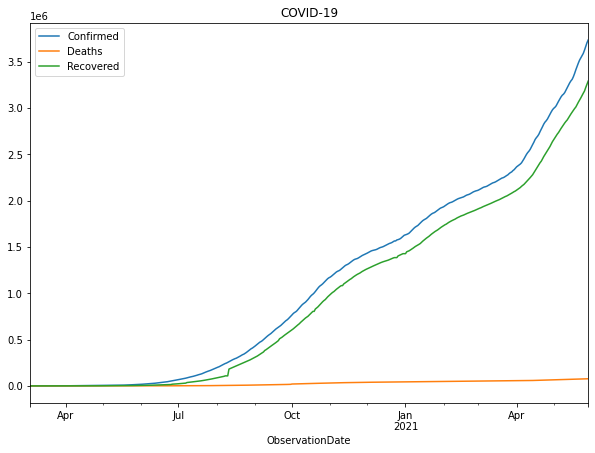

In [94]:
df_argentina.plot(figsize = (10,7), title='COVID-19')

Podemos adicionar informacion a nuestros ejes utilizando la librerias matplotlib.

In [95]:
import matplotlib.pyplot as plt


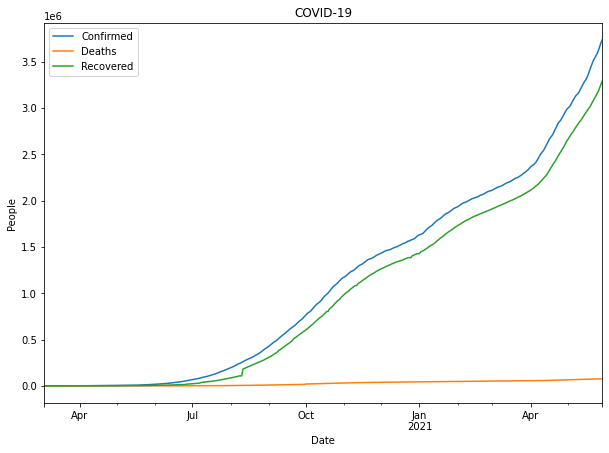

In [96]:
df_argentina.plot(figsize = (10,7), title='COVID-19')
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

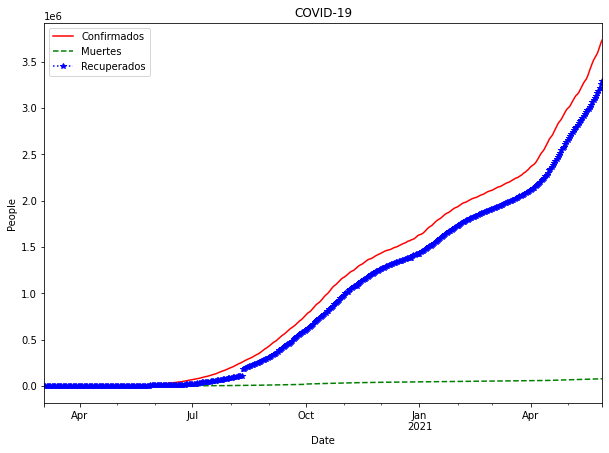

In [97]:
ax = df_argentina.plot(figsize = (10,7), title='COVID-19',
                  legend = False,
                  style = ['r-', 'g--', 'b:*'])
ax.legend(['Confirmados', 'Muertes', 'Recuperados'])
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

Vamos a crear un nuevo dataframe, para ver las ocurrencias mensuales:

In [98]:
df_monthly = df_argentina.resample('M').max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-03-31,1054.0,27.0,240.0
2020-04-30,4428.0,218.0,1256.0
2020-05-31,16851.0,539.0,5336.0
2020-06-30,64530.0,1307.0,22028.0
2020-07-31,191302.0,3543.0,83780.0
2020-08-31,417735.0,8660.0,301195.0
2020-09-30,751001.0,16937.0,594645.0
2020-10-31,1166924.0,31002.0,973939.0
2020-11-30,1424533.0,38730.0,1257227.0


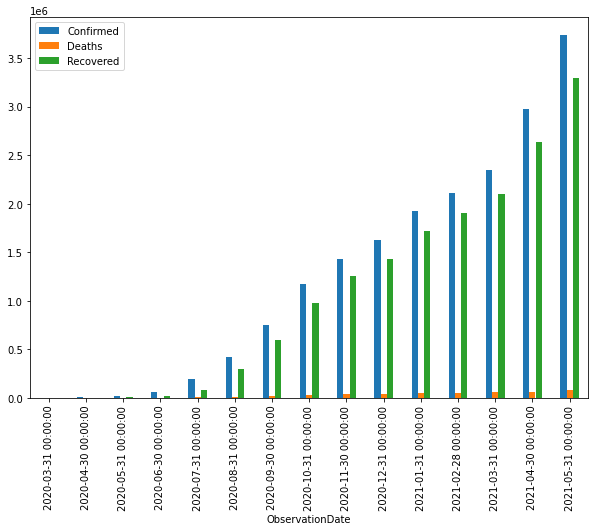

In [99]:
df_monthly.plot(figsize = (10,7), kind='bar')

Podemos juntar todos los datos por mes en una sola barra y ver la proporcion de cada variable.

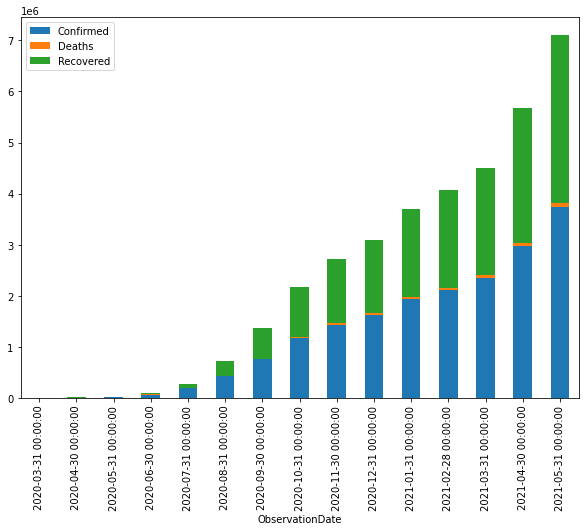

In [100]:
df_monthly.plot(figsize = (10,7), kind='bar', stacked=True)


Vamos a crear una nueva variable para mejorar nuestro grafico anterior, esta será una variable de las personas que han tenido tratamiento. Son personas que no estan muertas, pero tampoco se han recuperado. Son aquellas que se encuetran en confinamiento y sabemos que tienen COVID-19.

In [101]:
df_monthly['Traitment'] = df_monthly['Confirmed'] - df_monthly['Deaths'] - df_monthly['Recovered']
df_monthly['Traitment']

ObservationDate
2020-03-31       787.0
2020-04-30      2954.0
2020-05-31     10976.0
2020-06-30     41195.0
2020-07-31    103979.0
2020-08-31    107880.0
2020-09-30    139419.0
2020-10-31    161983.0
2020-11-30    128576.0
2020-12-31    155593.0
2021-01-31    157615.0
2021-02-28    150379.0
2021-03-31    190347.0
2021-04-30    279192.0
2021-05-31    366688.0
Freq: M, Name: Traitment, dtype: float64

In [102]:
df_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-03-31,1054.0,27.0,240.0,787.0
2020-04-30,4428.0,218.0,1256.0,2954.0
2020-05-31,16851.0,539.0,5336.0,10976.0
2020-06-30,64530.0,1307.0,22028.0,41195.0
2020-07-31,191302.0,3543.0,83780.0,103979.0
2020-08-31,417735.0,8660.0,301195.0,107880.0
2020-09-30,751001.0,16937.0,594645.0,139419.0
2020-10-31,1166924.0,31002.0,973939.0,161983.0
2020-11-30,1424533.0,38730.0,1257227.0,128576.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1fc1cc890>,
      dtype=object)

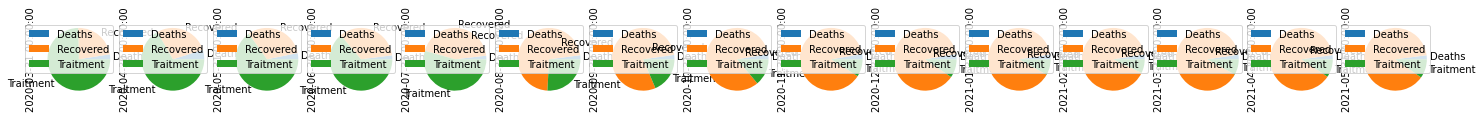

In [103]:
df_monthly[['Deaths', 'Recovered', 'Traitment']].T.plot(figsize = (25,25), kind='pie', subplots=True)

Podemos ir viendo como la proporcion de color naranja, recuperados, va aumentando a medida que pasa el tiempo, esto quiere decir que la cantidad de recuperados va aumentando en el tiempo. Tambien se resalta que el color azul, las muertes, han ido aumentando y luego se fue manteniendo.

Haremos ahora un histograma de como se distribuye nuestra tasa de supervivencia en Argentina

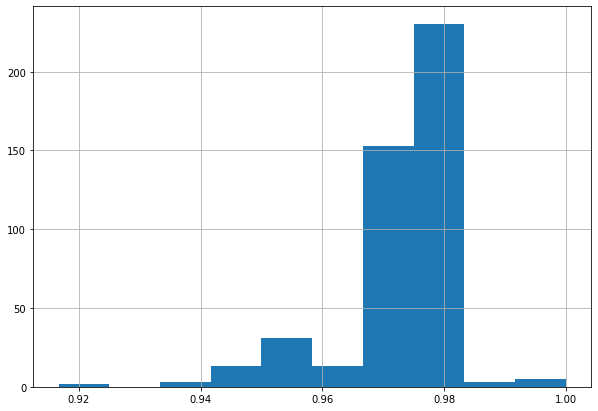

In [104]:
df_argentina['rate-argentina'] = 1 - df_argentina['Deaths'] / df_argentina['Confirmed']
df_argentina['rate-argentina'].hist(figsize = (10,7), bins = 10)

Obtengando una distribucion  parametrica alrededor del valor de la tasa de supervivencia.

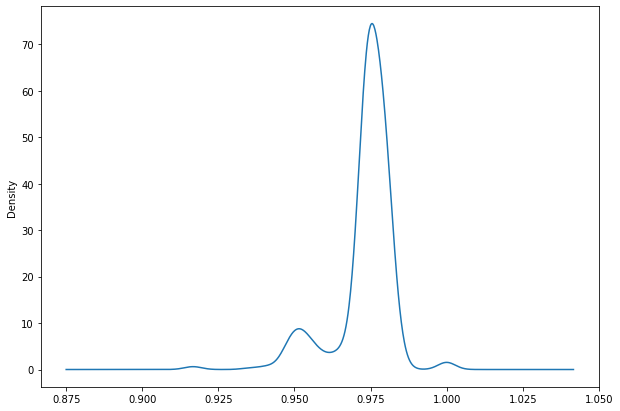

In [105]:
df_argentina['rate-argentina'].plot(kind='kde', figsize = (10,7))